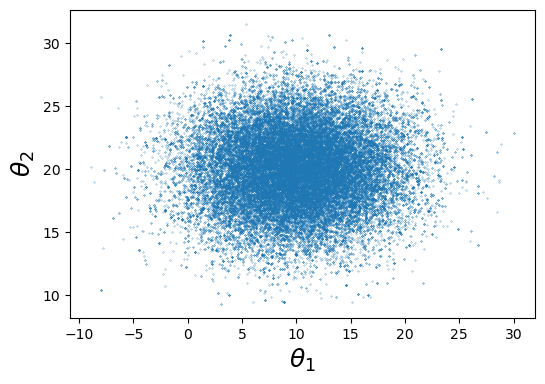

0.5057


In [1]:
def uni(x1, a1, a2):
    if a1<x1<a2 :
        return 1/(a2-a1)
    else :
        return 0

def likelihood(x1,x2):
    return np.exp(-(x1-10)**2/50-(x2-20)**2/18)


def g(x1,x2):
    return likelihood(x1,x2)*uni(x1,-100,100)*uni(x2,-100,100)


import numpy as np
import random
import matplotlib.pyplot as plt

sigma = 4.2
theta1 = random.gauss(0, sigma)
theta2 = theta1
l1 = []
l2 = []

for i in range(10000):
    thetap1 = theta1 + random.gauss(0,sigma)
    thetap2 = theta2 + random.gauss(0,sigma)
    rho = g(thetap1, thetap2)/g(theta1, theta2)
    if rho>=1 :
        theta1 = thetap1
        theta2 = thetap2
    elif rho>random.random() :
        theta1 = thetap1
        theta2 = thetap2

a = 0

for i in range(50000):
    thetap1 = theta1 + random.gauss(0,sigma)
    thetap2 = theta2 + random.gauss(0,sigma)
    rho = g(thetap1, thetap2)/g(theta1, theta2)
    if rho>=1 :
        theta1 = thetap1
        theta2 = thetap2
        a = a+1
    elif rho>random.random() :
        theta1 = thetap1
        theta2 = thetap2
        a = a+1
    l1.append(theta1)
    l2.append(theta2)


fig = plt.figure(figsize=(6, 4))
plt.scatter(l1, l2, s=0.05)

plt.xlabel(r'$\theta_1$', fontsize = 18)
plt.ylabel(r'$\theta_2$', fontsize = 18)
plt.savefig('/Users/ngalanis/VSCode Pictures/highQ/Basic Sampling Plot.pdf', bbox_inches='tight', dpi=600)
plt.show()
print(a/50000)

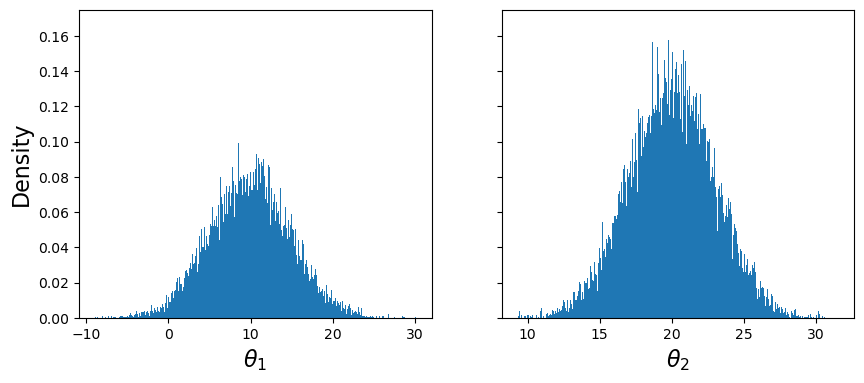

In [2]:
fig, ax = plt.subplots(1,2, figsize=(10,4), sharey=True)
plt.subplot(1,2,1)
plt.hist(l1, bins=500, density=True)
plt.xlabel(r'$\theta_1$', fontsize = 16)
plt.ylabel('Density', fontsize = 16)

plt.subplot(1,2,2)
plt.hist(l2, bins=500, density=True)
plt.xlabel(r'$\theta_2$', fontsize = 16)

plt.savefig('/Users/ngalanis/VSCode Pictures/highQ/Basic Sampling histo.pdf', bbox_inches='tight', dpi=600)
plt.show()